In [13]:
import pandas as pd 

#Load dataset 
df= pd.read_csv(r"C:\Users\victor wayne\OneDrive\Desktop\Data analysis project Feb\python_phase\Combined_dataset.csv")

#Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    1000 non-null   object 
 1   ProductName  999 non-null    object 
 2   Category     1000 non-null   object 
 3   BasePrice    1000 non-null   float64
 4   OrderID      1000 non-null   object 
 5   CustomerID   1000 non-null   object 
 6   OrderDate    1000 non-null   object 
 7   TotalPrice   1000 non-null   float64
 8   Name         1000 non-null   object 
 9   Email        1000 non-null   object 
 10  Country      1000 non-null   object 
dtypes: float64(2), object(9)
memory usage: 86.1+ KB
None
  ProductID ProductName        Category  BasePrice   OrderID CustomerID  \
0  PROD5000        Road  Home & Kitchen     492.53  ORD20000   CUST1000   
1  PROD5001        Best            Toys      14.82  ORD20001   CUST1001   
2  PROD5002    Computer        Clothing     173.44  ORD20002   CU

In [5]:
#Total Sales by Product
product_sales = df.groupby('ProductName')['TotalPrice'].sum().sort_values(ascending=False)
print(product_sales.head(10)) #top 10 products by revenue

ProductName
Act         5024.51
Special     4635.52
Anyone      4143.07
Social      3775.39
Up          3734.97
Campaign    3688.88
Artist      3635.10
Today       3625.75
Support     3596.58
Coach       3536.03
Name: TotalPrice, dtype: float64


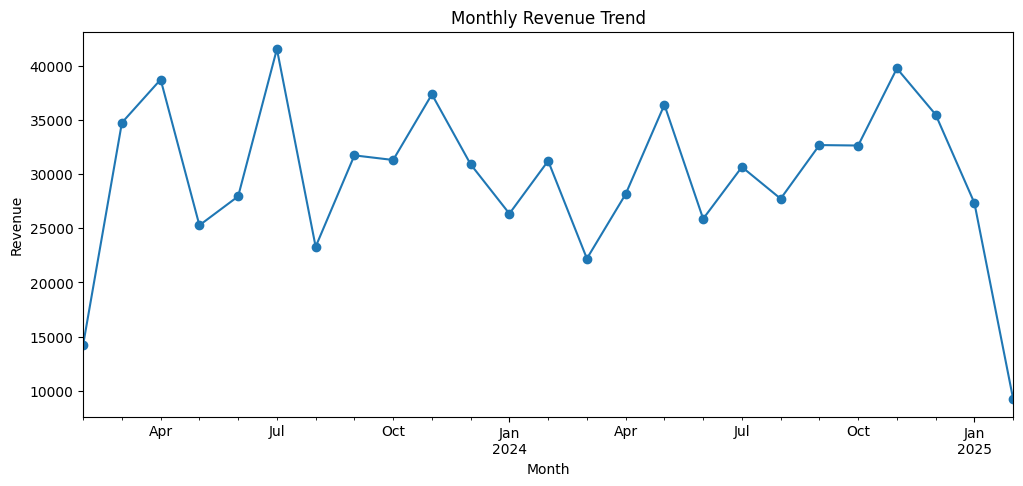

In [15]:
import matplotlib.pyplot as plt

#convert Orderdate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

#Extract Year-Month
df['YearMonth'] = df['OrderDate'].dt.to_period('M')

#Aggregate sales by month
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

#Plot Line chart 
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', title="Monthly Revenue Trend")
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [7]:
customer_sales = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print(customer_sales.head(10))


CustomerID
CUST1620    1498.13
CUST1912    1496.80
CUST1811    1495.66
CUST1834    1494.75
CUST1762    1494.26
CUST1572    1493.62
CUST1958    1491.63
CUST1647    1489.49
CUST1450    1486.20
CUST1875    1477.51
Name: TotalPrice, dtype: float64


In [16]:
#Extract year and month for trends
df['OrderYear'] = df['OrderDate'].dt.year
df['OrderDate'] = df['OrderDate'].dt.month

In [17]:
#calculate Profit margin(assume 20%)
df['Profit']=df['TotalPrice']*0.2 #20% margin

In [ ]:
#exporting data into csv 
df.to_csv('Cleaned_power_bi_data.csv', index=False, date_format='%Y-%m-%d')  # Export with date format YYYY-MM-DD
print("Data saved successfully for Power BI!")


Data saved successfully for Power BI!


In [25]:
print("Sales Statistics:")
print(df['TotalPrice'].describe())  # Summary of sales


Sales Statistics:
count    1000.000000
mean      742.548740
std       427.354342
min        20.870000
25%       363.230000
50%       750.990000
75%      1108.782500
max      1498.130000
Name: TotalPrice, dtype: float64
